# Exploring Gliders data

Autonomous gliders produce dense, multi-sensor, multi-platform datasets that cannot be understood from a single plot or a single number. The first step in working with any such dataset is exploratory data analysis, which means using multiple visualisations to discover structure, variability, and problems before any formal scientific analysis or modelling is attempted. This approach is standard in both statistics and geophysical data analysis. Tukey (1977) formalised exploratory data analysis as the process of “looking at data to see what it seems to say”, rather than testing a predefined hypothesis. In oceanography, this philosophy underpins all quality control and interpretation of observational data, where anomalies must be examined across depth, time, and sensors before they can be classified as either real ocean signals or instrumental artefacts.
Glider datasets are particularly challenging because they combine
<li> strong temporal variability (sub-daily to seasonal) 
<li> strong vertical structure (mixed layer, thermocline, deep water) 
<li> spatial sampling along a moving track, and 
<li> sensor-specific behaviour (noise, lags, biofouling, drift).
<br><br>
A feature that looks like a biological bloom, a mixing event, or a front in one view may be an artefact of sensor behaviour, sampling strategy, or platform motion when seen in another. For this reason, robust glider analysis always relies on multiple independent views of the same data, for example time-depth sections, time series at fixed depths, and individual profiles.
 
In this notebook you will work with three complementary plot types:
1. Time–depth cross-sections, which reveal vertical structure and how it evolves.
2. Time series at fixed depth ranges, which highlight temporal variability and inter-glider differences.
3. Single up and down profiles, which expose sensor lags, hysteresis, and small-scale vertical features.
 

## Outline of the notebook

1. Load necessary libraries
2. Load glider data
3. Visualize glider tracks
4. Visualize glider transects
5. Analyze glider data
6. Conclusion and next steps

## 1. Load necessary libraries

We will use the following libraries for data handling and visualization:

**Xarray** is a library for working with labeled multi-dimensional arrays, particularly useful for handling netCDF files.
**Numpy** is a fundamental package for scientific computing in Python.
**Pandas** is a powerful data manipulation library.
**Matplotlib** is a widely used plotting library for creating static, animated, and interactive visualizations in Python.



In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load glider data

We open the glider data using Xarray. The data is stored in netCDF format, which is commonly used for storing multi-dimensional scientific data.



In [2]:
import os
#we create a list of the dataset file
file_list = os.listdir('./data/')

In [3]:
cabot_path = file_list[0]
cabot_ds = xr.open_dataset('./data/' + cabot_path)

We can easily inspect the contents of the dataset to understand its structure and the variables it contains.

In [4]:
display(cabot_ds)

<xarray.Dataset> Size: 366MB
Dimensions:                               (N_MEASUREMENTS: 1454183, N_PARAM: 22)
Dimensions without coordinates: N_MEASUREMENTS, N_PARAM
Data variables: (12/69)
    TIME                                  (N_MEASUREMENTS) datetime64[ns] 12MB ...
    TIME_GPS                              (N_MEASUREMENTS) datetime64[ns] 12MB ...
    PHASE                                 (N_MEASUREMENTS) float32 6MB ...
    PHASE_QC                              (N_MEASUREMENTS) float32 6MB ...
    PRES                                  (N_MEASUREMENTS) float32 6MB ...
    CNDC                                  (N_MEASUREMENTS) float32 6MB ...
    ...                                    ...
    DEPTH                                 (N_MEASUREMENTS) float64 12MB ...
    PRAC_SALINITY                         (N_MEASUREMENTS) float64 12MB ...
    ABS_SALINITY                          (N_MEASUREMENTS) float64 12MB ...
    CONS_TEMP                             (N_MEASUREMENTS) float64 12MB ...
    DENSITY                               (N_MEASUREMENTS) float64 12MB ...
    PROFILE_NUMBER                        (N_MEASUREMENTS) float64 12MB ...
Attributes: (12/68)
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds_vertical_crs:  EPSG:5831
    geospatial_lat_min:              50.89261
    geospatial_lat_max:              62.48666
    geospatial_lon_min:              50.89261
    geospatial_lon_max:              62.48666
    ...                              ...
    instrument:                      ['SBE Slocum Glider Payload (GPCTD) CTD'...
    metadata_link:                   https://api.linked-systems.uk/api/meta/v...
    trajectory:                      Cabot_20240528
    date_created:                    2024-09-26T14:34:53.791760
    date_modified:                   2024-09-26T14:34:53.792464
    id:                              Cabot_20240528T000000_R

The first thing to do is to visualize the glider tracks on a map.

## 3. Visualize glider tracks

We will use cartopy to create a map and plot the glider's track on it. This will help us visualize the path taken by the glider during its deployment.

Text(0.5, 1.0, 'Glider Track with Time as Color')

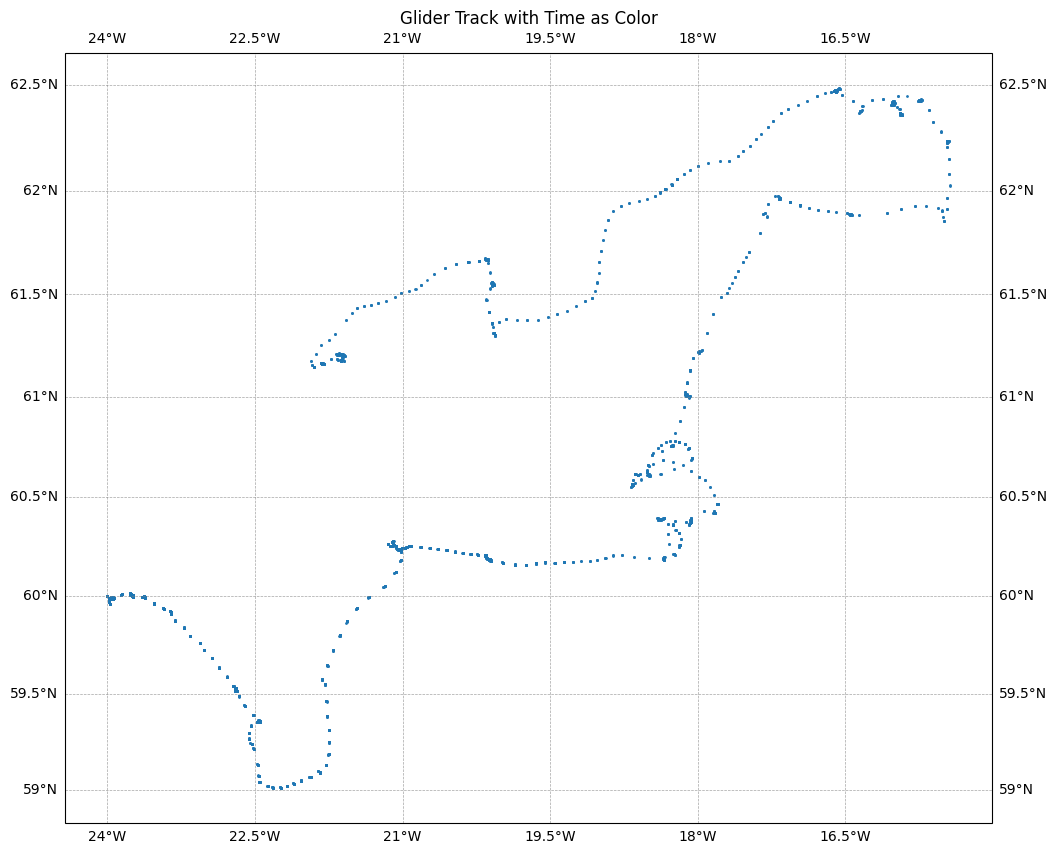

In [5]:
import cartopy.crs as ccrs
# Filter the data where pressure is less than 5
filtered_data = cabot_ds.where((cabot_ds.PRES < 5) & (cabot_ds.LATITUDE > 51), drop=True)

# Extract longitude, latitude, and time
filtered_lons = filtered_data.LONGITUDE.values
filtered_lats = filtered_data.LATITUDE.values


# Create the scatter plot with time as the color
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(
    1, 1, 1,
    projection=ccrs.Mercator()
)
sc = ax.scatter(filtered_lons, filtered_lats, s=1, transform=ccrs.PlateCarree())

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    alpha=0.7,
    linestyle="--",
    crs=ccrs.PlateCarree()
)
# Set the title for the plot
ax.set_title('Glider Track with Time as Color')

We can also visualise the other gliders transect leveraging the dictionnary structure. 

In [4]:
# Create a dictionary to store datasets for each glider
glider_datasets = {file.split('_')[0]: xr.open_dataset(f'./data/{file}') for file in file_list}

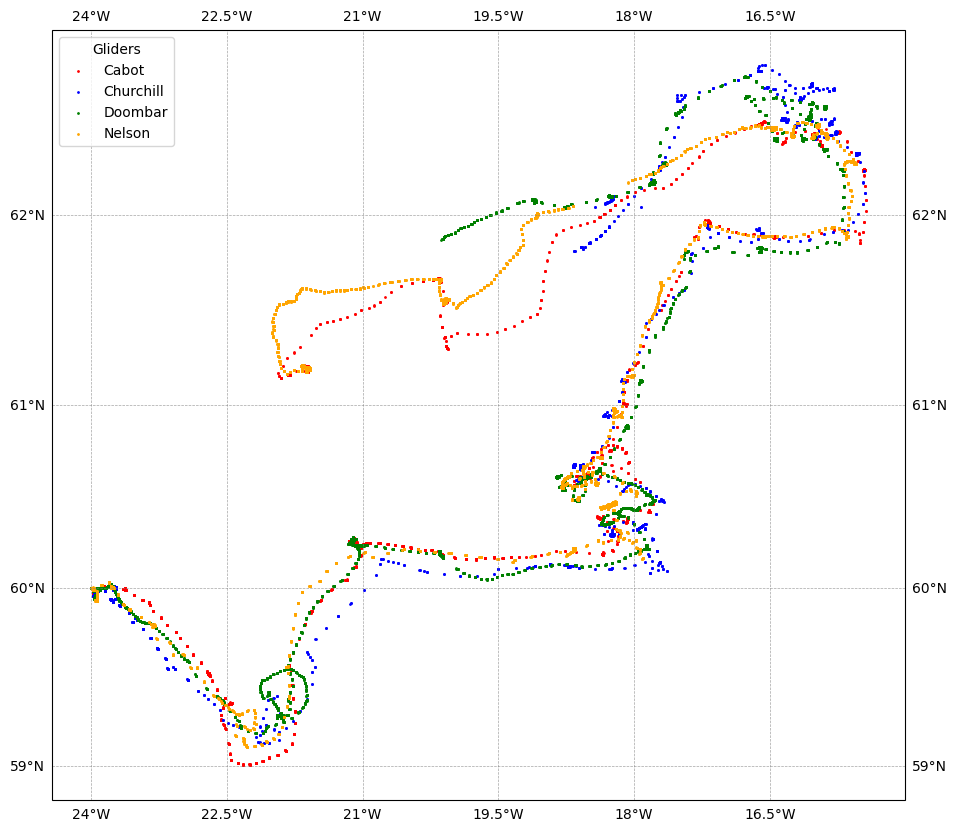

In [7]:
from itertools import cycle

# Define a color scheme for the gliders
colors = cycle(['red', 'blue', 'green', 'orange'])

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(
    1, 1, 1,
    projection=ccrs.Mercator()
)

# Add each glider's track to the existing plot
for glider_name, dataset in glider_datasets.items():
    # Filter the data where pressure is less than 5
    filtered_data = dataset.where((dataset.PRES < 5) & (dataset.LATITUDE > 51), drop=True)
    
    # Extract longitude and latitude
    lons = filtered_data.LONGITUDE.values
    lats = filtered_data.LATITUDE.values
    
    # Plot the glider track with a unique color
    ax.scatter(lons, lats, s=1, color=next(colors), transform=ccrs.PlateCarree(), label=glider_name)

gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    alpha=0.7,
    linestyle="--",
    crs=ccrs.PlateCarree()
)
ax.legend(title="Gliders", loc='upper left')
fig.canvas.draw()

We will now start to look more into each glider's data by visualizing a transect of temperature and salinity.

Have a look back to the OG1 data display to identify the name of the variables you want to plot.

## 3. Visualize glider transects

We will create a figure with two subplots: one for temperature and one for salinity. Each subplot will display the respective variable as a function of depth and time.
We can use the `pcolormesh` function from Matplotlib to create the color plots for temperature and salinity.


The Challenge comes from the misalignement of the scientific sensors with the pressure sensor. To make sure we are able to plot everythin correctly we will have to interpolate the depth over time. 

### Interpolating Depth Values in Glider Data

The *interpolate_depth* function is designed to handle missing depth values in glider datasets by performing interpolation over time. This is particularly useful when depth measurements are incomplete or misaligned with other variables, which can hinder data visualization and analysis.

#### Function Overview

The function takes an *xarray.Dataset* as input and creates a new variable, *DEPTH_INTERP*, which contains interpolated depth values. The interpolation ensures that gaps in the depth data are filled, enabling smoother and more accurate plotting of transects.


1. **Input Parameters**:
    - `ds`: The glider dataset containing `TIME` and `DEPTH` (or `PRES`) variables.
    - `method`: The interpolation method, which can be `'linear'` (default) or `'nearest'`.

2. **Depth Variable Selection**:
    - The function checks for the presence of `DEPTH` or `PRES` in the dataset. If neither is found, an error is raised.

3. **Time Handling**:
    - The `TIME` variable is converted to seconds for interpolation if it is in datetime format.

4. **Interpolation Process**:
    - Missing depth values are filled using the specified interpolation method.
    - Extrapolation is limited to avoid filling values too far outside the valid range.

5. **Output**:
    - A new variable, `DEPTH_INTERP`, is added to the dataset. This variable contains the interpolated depth values and retains the attributes of the original depth variable.


In [5]:
def interpolate_depth(ds, method='linear'):
    """
    Interpolate missing depth values over time.
    
    Creates a new DEPTH_INTERP variable with gaps filled by linear interpolation.
    Useful when DEPTH has missing values that would cause gaps in transect plots.
    
    Parameters
    ----------
    ds : xarray.Dataset
        Glider dataset with TIME and DEPTH (or PRES) variables
    method : str, optional
        Interpolation method: 'linear' or 'nearest' (default: 'linear')
        
    Returns
    -------
    ds : xarray.Dataset
        Dataset with added DEPTH_INTERP variable
    """
    
    # Determine which depth variable to use
    if "DEPTH" in ds.variables:
        depth_var = "DEPTH"
        depth = ds.DEPTH.values.copy()
    elif "PRES" in ds.variables:
        depth_var = "PRES"
        depth = ds.PRES.values.copy()
        print("Using PRES as depth")
    else:
        raise ValueError("No DEPTH or PRES variable found in dataset")
    
    # Get time variable
    if "TIME" not in ds.variables:
        raise ValueError("No TIME variable found in dataset")
    
    time = ds.TIME.values
    
    # Check for datetime conversion
    if np.issubdtype(time.dtype, np.datetime64):
        # Convert datetime to seconds for interpolation
        time_seconds = (time - time[0]) / np.timedelta64(1, 's')
    else:
        time_seconds = time
    
    # Count missing values
    n_total = len(depth)
    n_missing = np.sum(~np.isfinite(depth))
    n_valid = n_total - n_missing
    
    print(f"\nDepth interpolation:")
    print(f"  Total points: {n_total}")
    print(f"  Valid depth: {n_valid} ({100*n_valid/n_total:.1f}%)")
    print(f"  Missing depth: {n_missing} ({100*n_missing/n_total:.1f}%)")
    
    if n_missing == 0:
        print("  No interpolation needed - all depth values are valid")
        ds["DEPTH_INTERP"] = ds[depth_var].copy()
        return ds
    
    if n_valid < 2:
        print("  ERROR: Need at least 2 valid depth values for interpolation")
        return ds
    
    # Find valid data points
    valid_mask = np.isfinite(depth) & np.isfinite(time_seconds)
    
    if np.sum(valid_mask) < 2:
        print("  ERROR: Need at least 2 valid time+depth pairs for interpolation")
        return ds
    
    # Interpolate
    from scipy import interpolate
    
    f_interp = interpolate.interp1d(
        time_seconds[valid_mask],
        depth[valid_mask],
        kind=method,
        bounds_error=False,
        fill_value='extrapolate'
    )
    
    depth_interp = f_interp(time_seconds)
    
    # Don't extrapolate too far - set to NaN if original was NaN at edges
    # Only fill interior gaps
    first_valid = np.where(valid_mask)[0][0]
    last_valid = np.where(valid_mask)[0][-1]
    depth_interp[:first_valid] = np.nan
    depth_interp[last_valid+1:] = np.nan
    
    # Create new variable
    ds["DEPTH_INTERP"] = xr.DataArray(
        depth_interp,
        dims=ds[depth_var].dims,
        coords=ds[depth_var].coords,
    )
    
    if hasattr(ds[depth_var], 'attrs'):
        ds["DEPTH_INTERP"].attrs = ds[depth_var].attrs.copy()
    ds["DEPTH_INTERP"].attrs["comment"] = f"Interpolated {depth_var} (method={method})"
    
    n_filled = np.sum(np.isfinite(depth_interp)) - n_valid
    print(f"  Filled {n_filled} missing values by interpolation")
    
    return ds

In [6]:
caot_ds = interpolate_depth(cabot_ds, method='linear')


Depth interpolation:
  Total points: 1454183
  Valid depth: 336831 (23.2%)
  Missing depth: 1117352 (76.8%)
  Filled 1117343 missing values by interpolation


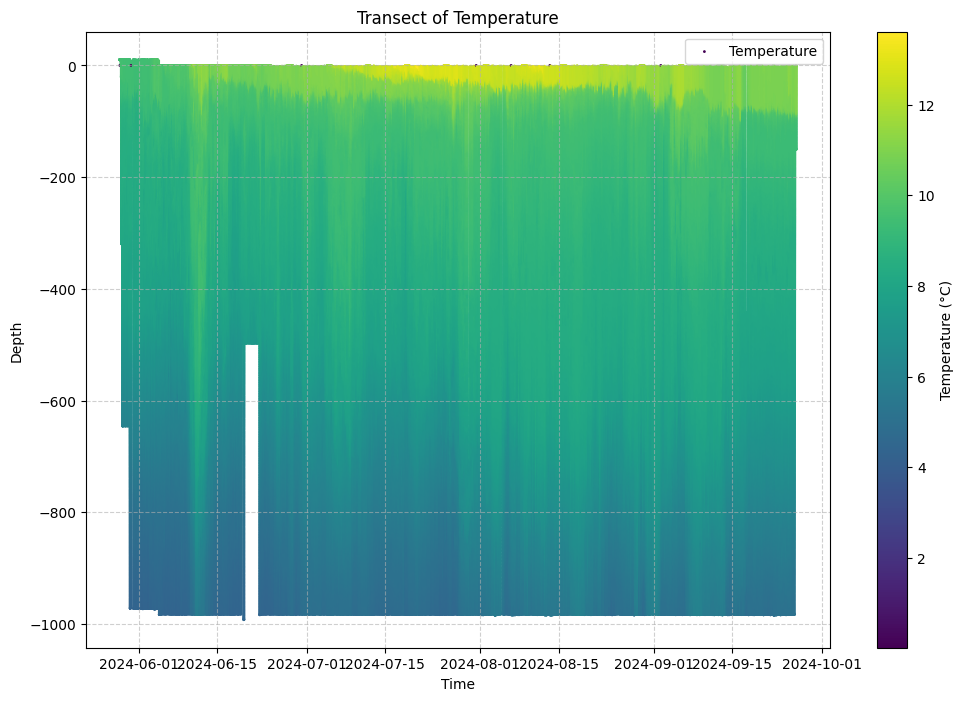

In [10]:
# Extract temperature and depth data from cabot_ds
temperature = cabot_ds['CONS_TEMP'].values
depth = cabot_ds['DEPTH_INTERP'].values
time = cabot_ds['TIME'].values

# Mask for valid (non-NaN) temperature and depth values
valid_mask = np.isfinite(temperature) & np.isfinite(depth) & (cabot_ds['LATITUDE'].values > 51)

# Plot transect of temperature
plt.figure(figsize=(12, 8))
plt.scatter(time[valid_mask], depth[valid_mask], c=temperature[valid_mask], cmap='viridis', s=1, label='Temperature')

plt.colorbar(label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Depth')
plt.title('Transect of Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Now, to make our life easier, we will create a function that will handle the plotting of transects for any variable we want to visualize.


In [11]:
def plot_transect(dataset, variable, depth_var='DEPTH_INTERP', time_var='TIME', log = False, lat_filter=51, cmap='viridis', depth_min=0, depth_max=1000):
    """
    Plot a transect of the specified variable as a function of depth and time.

    Parameters
    ----------
    dataset : xarray.Dataset
        The dataset containing the variable to plot.
    variable : str
        The name of the variable to plot.
    depth_var : str, optional
        The name of the depth variable (default is 'DEPTH_INTERP').
    time_var : str, optional
        The name of the time variable (default is 'TIME').
    lat_filter : float, optional
        Latitude filter to exclude data below this value (default is 51).
    cmap : str, optional
        Colormap for the plot (default is 'viridis').

    Returns
    -------
    None
    """
    # Extract data
    var_data = dataset[variable].values
    depth = dataset[depth_var].values
    time = dataset[time_var].values

    # Mask for valid (non-NaN) variable and depth values
    valid_mask = (
        np.isfinite(var_data) & 
        np.isfinite(depth) & 
        (dataset['LATITUDE'].values > lat_filter)
    )

    # Plot transect
    plt.figure(figsize=(12, 8))
    plt.scatter(
        time[valid_mask], 
        depth[valid_mask], 
        c=var_data[valid_mask], 
        cmap=cmap, 
        s=1, 
        label=variable
    )
    plt.ylim([-depth_max, depth_min])
    plt.colorbar(label=f'{variable} (units)')
    plt.xlabel('Time')
    plt.ylabel('Depth')
    plt.title(f'Transect of {variable}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

### Function: `plot_transect`

The `plot_transect` function is designed to create a transect plot of a specified variable from a glider dataset. The transect is visualized as a scatter plot, where the variable is plotted as a function of depth and time, with color representing the variable's value.

#### Parameters:
- **`dataset`**: The `xarray.Dataset` containing the data to be plotted.
- **`variable`**: The name of the variable to plot (e.g., temperature, salinity).
- **`depth_var`** (optional): The name of the depth variable in the dataset. Defaults to `'DEPTH_INTERP'`.
- **`time_var`** (optional): The name of the time variable in the dataset. Defaults to `'TIME'`.
- **`lat_filter`** (optional): A latitude filter to exclude data below this value. Defaults to `51`.
- **`cmap`** (optional): The colormap to use for the plot. Defaults to `'viridis'`.

#### Functionality:
1. **Data Extraction**:
    - Extracts the specified variable, depth, and time data from the dataset.
    - Applies a mask to filter out invalid (NaN) values and data below the specified latitude.

2. **Plotting**:
    - Creates a scatter plot with time on the x-axis, depth on the y-axis, and the variable's value represented by color.
    - Adds a color bar to indicate the scale of the variable.
    - Labels the axes and adds a title and legend for clarity.

3. **Customization**:
    - Allows the user to specify the colormap and adjust the latitude filter.

#### Output:
- The function displays the transect plot but does not return any value.

In [12]:
variable_to_plot = "BBP700"
time_variable = "TIME"


c:\Users\petit\Documents\apart_demo\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


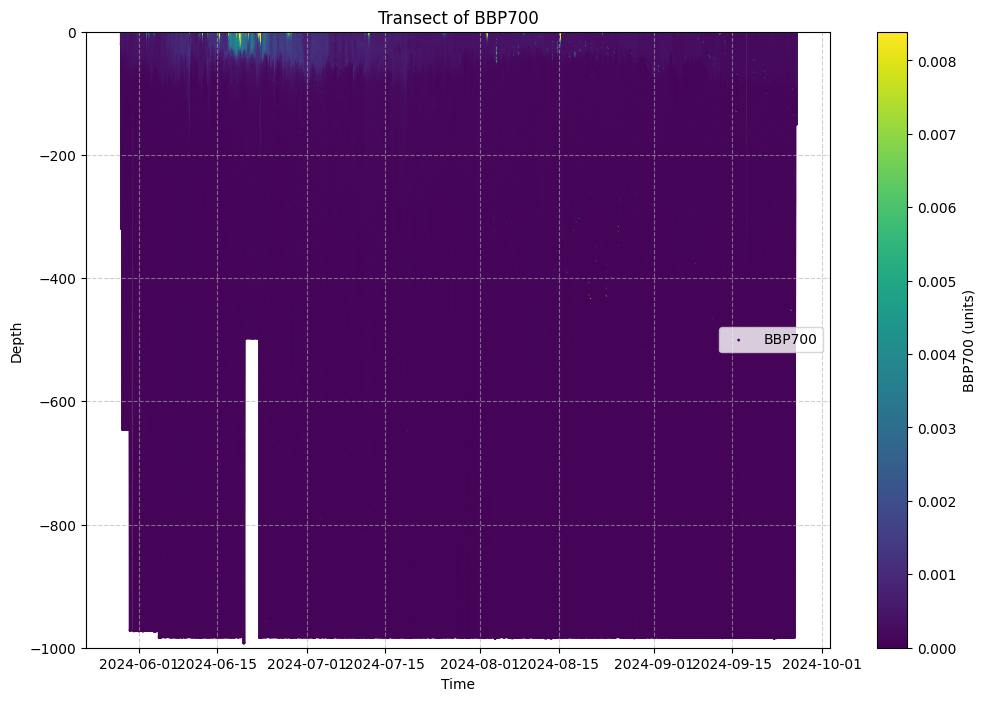

In [13]:

plot_transect(cabot_ds, variable_to_plot, time_var = time_variable, lat_filter=51, cmap='viridis')

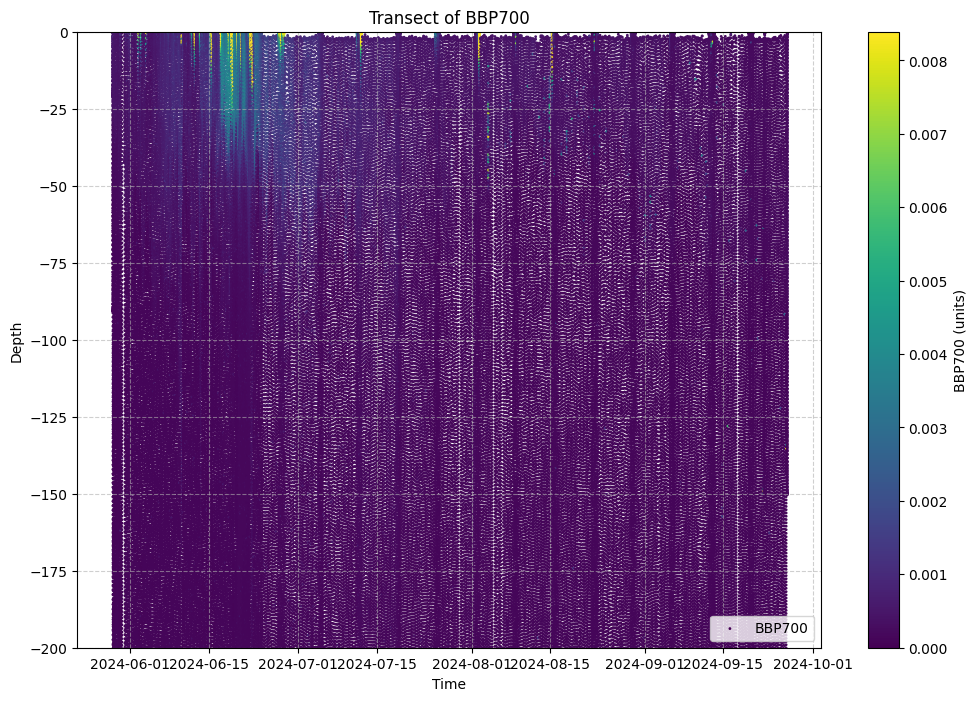

In [14]:
plot_transect(cabot_ds, variable_to_plot, time_var = time_variable, lat_filter=51, cmap='viridis', depth_max=200)

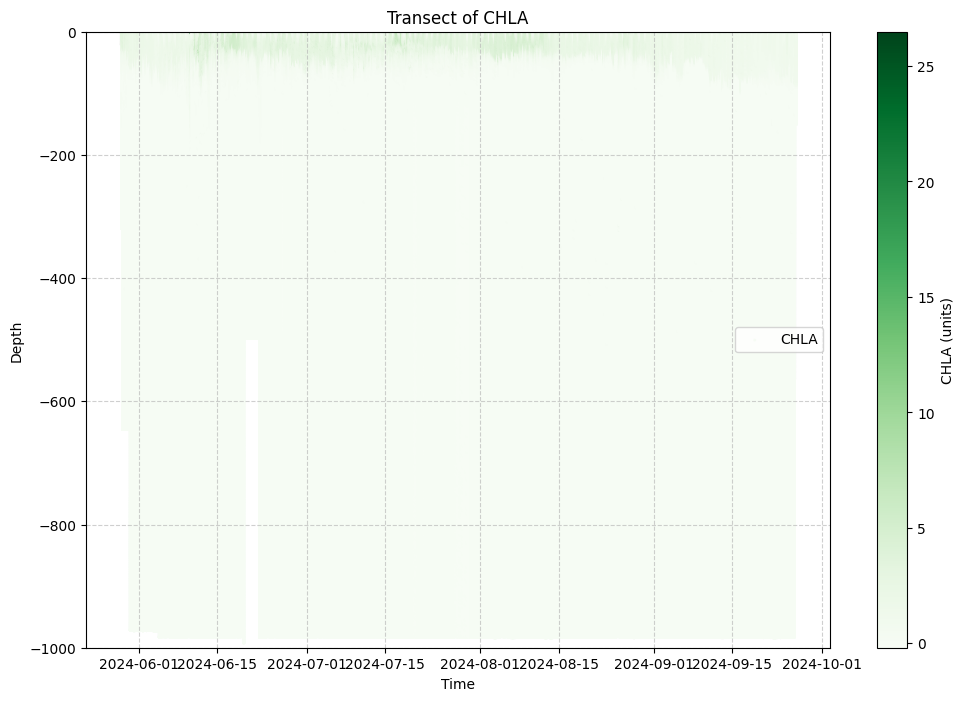

In [15]:
plot_transect(cabot_ds, 'CHLA', depth_var='DEPTH_INTERP', time_var='TIME', log = True, cmap='Greens')

We can play with the depth min and max arguments to focus on specific depth ranges of interest.

When we zoom in we need to adjust the color scale to better visualize the data and interpolate the missing data.

We will adapt the plotting function to interpolate the var and use pclormesh instead of scatter for better visualization.

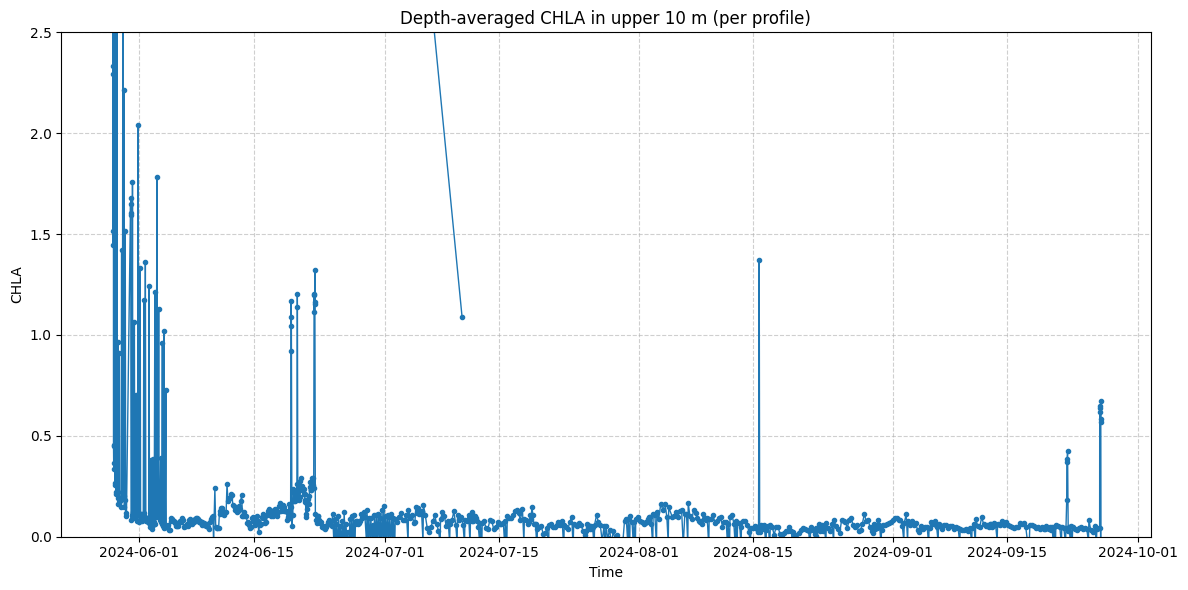

In [7]:
# --------------------------------------------------
# Work on a small Dataset (critical!)
# --------------------------------------------------
ds = cabot_ds[["CHLA", "DEPTH_INTERP", "TIME", "PROFILE_NUMBER", "LATITUDE"]]

# --------------------------------------------------
# Mask upper 10 m WITHOUT dropping dimensions
# --------------------------------------------------
ds = ds.where((ds.DEPTH_INTERP < 10) & (ds.LATITUDE > 51))

# --------------------------------------------------
# Group once and compute everything
# --------------------------------------------------
profile_ts = (
    ds
    .groupby("PROFILE_NUMBER")
    .map(
        lambda g: xr.Dataset(
            {
                "CHLA": g.CHLA.mean(skipna=True),
                "TIME": g.TIME.mean(skipna=True),
            }
        )
    )
)

# --------------------------------------------------
# Plot
# --------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(
    profile_ts.TIME,
    profile_ts.CHLA,
    marker="o",
    markersize=3,
    linewidth=1,
)

plt.xlabel("Time")
plt.ylabel("CHLA")
plt.ylim(0, 2.5)
plt.title("Depth-averaged CHLA in upper 10 m (per profile)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Function: `plot_four_random_profiles`

The `plot_four_random_profiles` function is designed to visualize four random vertical profiles of a specified variable for a given glider. Each profile represents the variable as a function of depth, allowing for quick inspection of the data's vertical structure.

#### Parameters:
1. **`glider_ds_dict`**: A dictionary containing datasets for multiple gliders, where the keys are glider names and the values are `xarray.Dataset` objects.
2. **`glider_name`**: The name of the glider (key in the dictionary) for which the profiles will be plotted.
3. **`variable`**: The variable to plot (e.g., `'CHLA'` for chlorophyll).
4. **`depth_var`** (optional): The name of the depth variable in the dataset. Defaults to `'DEPTH_INTERP'`.
5. **`invert_depth`** (optional): Whether to invert the depth axis so that deeper values are at the bottom. Defaults to `True`.
6. **`seed`** (optional): A random seed for reproducibility of the selected profiles. Defaults to `None`.
7. **`figsize`** (optional): The size of the figure. Defaults to `(10, 8)`.

#### Functionality:
1. **Profile Selection**:
    - Retrieves all unique profile numbers from the dataset for the specified glider.
    - Randomly selects four profiles using a reproducible random number generator (if `seed` is provided).

2. **Data Extraction**:
    - For each selected profile, extracts the depth and variable values.
    - Filters out invalid (NaN) values and sorts the data by depth for proper plotting.

3. **Plotting**:
    - Creates a 2x2 grid of subplots, with each subplot displaying one of the selected profiles.
    - Plots the variable on the x-axis and depth on the y-axis, with optional depth inversion.
    - Adds titles, labels, and gridlines for clarity.

4. **Output**:
    - Displays the plot.
    - Returns the array of selected profile numbers for reference.

#### Use Case:
This function is useful for exploring the variability of a variable across different profiles in a glider dataset. By visualizing random profiles, users can quickly assess the data's quality, trends, and anomalies.

In [8]:

def plot_profile_averaged_timeseries(
    ds,
    variable,
    depth_limit=10,
    lat_filter=None,
    ylim=None,
    figsize=(12, 6),
):
    """
    Plot a time series of depth-averaged values per profile.

    Parameters
    ----------
    ds : xarray.Dataset
        Input dataset (e.g. cabot_ds).
    variable : str
        Variable to average and plot (e.g. 'CHLA').
    depth_limit : float, optional
        Maximum depth (m) to include in the average (default = 10).
    lat_filter : float or None, optional
        Minimum latitude to include (default = None).
    ylim : tuple or None, optional
        y-axis limits (min, max).
    figsize : tuple, optional
        Figure size.

    Returns
    -------
    profile_ts : xarray.Dataset
        Dataset containing profile-averaged variable and time.
    """

    # --------------------------------------------------
    # Work on minimal dataset (performance critical)
    # --------------------------------------------------
    needed_vars = [variable, "DEPTH_INTERP", "TIME", "PROFILE_NUMBER"]
    if lat_filter is not None:
        needed_vars.append("LATITUDE")

    ds_small = ds[needed_vars]

    # --------------------------------------------------
    # Apply masks (no drop=True for speed)
    # --------------------------------------------------
    mask = ds_small.DEPTH_INTERP < depth_limit
    if lat_filter is not None:
        mask = mask & (ds_small.LATITUDE > lat_filter)

    ds_masked = ds_small.where(mask)

    # --------------------------------------------------
    # Group once and compute profile means
    # --------------------------------------------------
    profile_ts = (
        ds_masked
        .groupby("PROFILE_NUMBER")
        .map(
            lambda g: xr.Dataset(
                {
                    variable: g[variable].mean(skipna=True),
                    "TIME": g.TIME.mean(skipna=True),
                }
            )
        )
    )

    # --------------------------------------------------
    # Plot
    # --------------------------------------------------
    plt.figure(figsize=figsize)
    plt.plot(
        profile_ts.TIME,
        profile_ts[variable],
        marker="o",
        markersize=3,
        linewidth=1,
    )

    plt.xlabel("Time")
    plt.ylabel(variable)

    title = f"Depth-averaged {variable} in upper {depth_limit} m (per profile)"
    if lat_filter is not None:
        title += f", Lat > {lat_filter}°"
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    return profile_ts


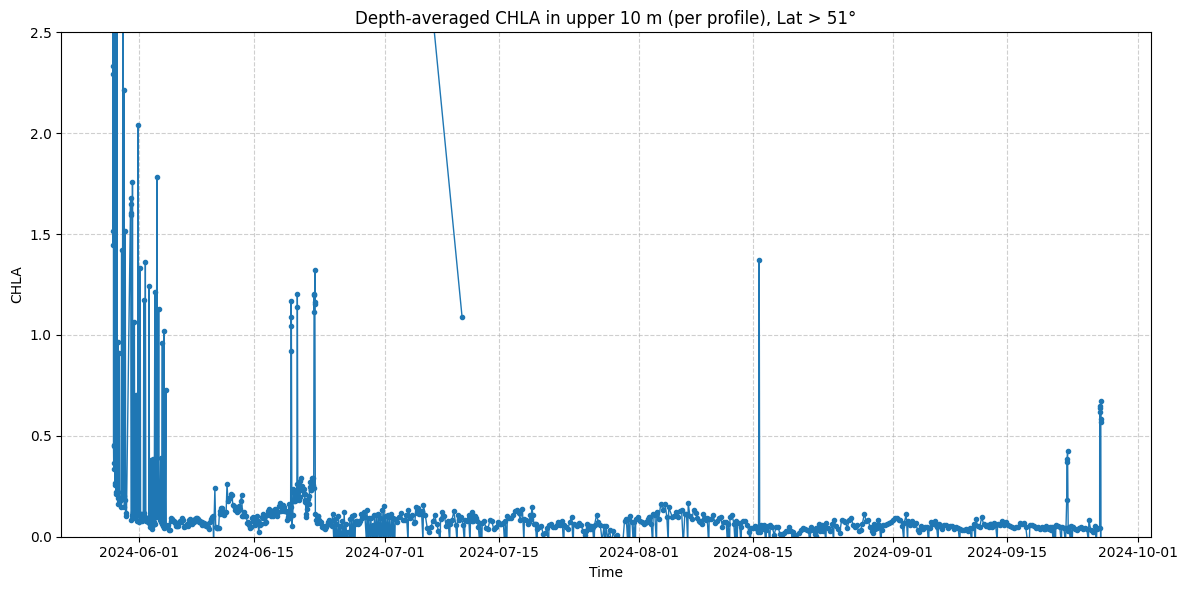

<xarray.Dataset> Size: 17kB
Dimensions:         (PROFILE_NUMBER: 868)
Coordinates:
  * PROFILE_NUMBER  (PROFILE_NUMBER) float64 7kB -1.0 1.0 2.0 ... 867.0 868.0
Data variables:
    CHLA            (PROFILE_NUMBER) float32 3kB 1.089 18.98 ... 0.5681 0.6716
    TIME            (PROFILE_NUMBER) datetime64[ns] 7kB 2024-07-10T10:27:42.3...

In [9]:
plot_profile_averaged_timeseries(
    cabot_ds, "CHLA", 10, lat_filter=51, ylim=(0, 2.5)
)

In [10]:

def plot_profile_timeseries_by_glider(
    glider_ds_dict,
    variable,
    depth_limit=10,
    lat_filter=None,
    ylim=None,
    figsize=(12, 6),
):
    """
    Plot depth-averaged (upper z m) time series per profile,
    one line per glider.

    Parameters
    ----------
    glider_ds_dict : dict
        Dictionary of {glider_name: xarray.Dataset}.
    variable : str
        Variable to average and plot (e.g. 'CHLA').
    depth_limit : float, optional
        Maximum depth (m) to include in the average.
    lat_filter : float or None, optional
        Minimum latitude filter.
    ylim : tuple or None, optional
        y-axis limits.
    figsize : tuple, optional
        Figure size.

    Returns
    -------
    results : dict
        Dictionary of {glider_name: xarray.Dataset} with
        profile-averaged variable and time.
    """

    fig, ax = plt.subplots(figsize=figsize)

    results = {}

    for name, ds in glider_ds_dict.items():

        # ----------------------------------------------
        # Work on minimal dataset
        # ----------------------------------------------
        needed_vars = [variable, "DEPTH_INTERP", "TIME", "PROFILE_NUMBER"]
        if lat_filter is not None:
            needed_vars.append("LATITUDE")

        ds_small = ds[needed_vars]

        # ----------------------------------------------
        # Mask
        # ----------------------------------------------
        mask = ds_small.DEPTH_INTERP < depth_limit
        if lat_filter is not None:
            mask = mask & (ds_small.LATITUDE > lat_filter)

        ds_masked = ds_small.where(mask)

        # ----------------------------------------------
        # Profile-averaged time series
        # ----------------------------------------------
        profile_ts = (
            ds_masked
            .groupby("PROFILE_NUMBER")
            .map(
                lambda g: xr.Dataset(
                    {
                        variable: g[variable].mean(skipna=True),
                        "TIME": g.TIME.mean(skipna=True),
                    }
                )
            )
        )

        results[name] = profile_ts

        # ----------------------------------------------
        # Plot
        # ----------------------------------------------
        ax.plot(
            profile_ts.TIME,
            profile_ts[variable],
            marker="o",
            markersize=3,
            linewidth=1.5,
            label=name,
        )

    # ----------------------------------------------
    # Axes formatting
    # ----------------------------------------------
    ax.set_xlabel("Time")
    ax.set_ylabel(variable)

    title = f"Depth-averaged {variable} (upper {depth_limit} m)"
    ax.set_title(title)

    if ylim is not None:
        ax.set_ylim(*ylim)

    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend(frameon=True)

    plt.tight_layout()
    plt.show()

    return results


In [11]:
# Interpolate depth for each dataset in glider_datasets
for glider_name, dataset in glider_datasets.items():
    glider_datasets[glider_name] = interpolate_depth(dataset, method='linear')


Depth interpolation:
  Total points: 1454183
  Valid depth: 336831 (23.2%)
  Missing depth: 1117352 (76.8%)
  Filled 1117343 missing values by interpolation

Depth interpolation:
  Total points: 1168325
  Valid depth: 270473 (23.2%)
  Missing depth: 897852 (76.8%)
  Filled 897778 missing values by interpolation

Depth interpolation:
  Total points: 1996165
  Valid depth: 471377 (23.6%)
  Missing depth: 1524788 (76.4%)
  Filled 1524779 missing values by interpolation

Depth interpolation:
  Total points: 1993536
  Valid depth: 461659 (23.2%)
  Missing depth: 1531877 (76.8%)
  Filled 1531868 missing values by interpolation


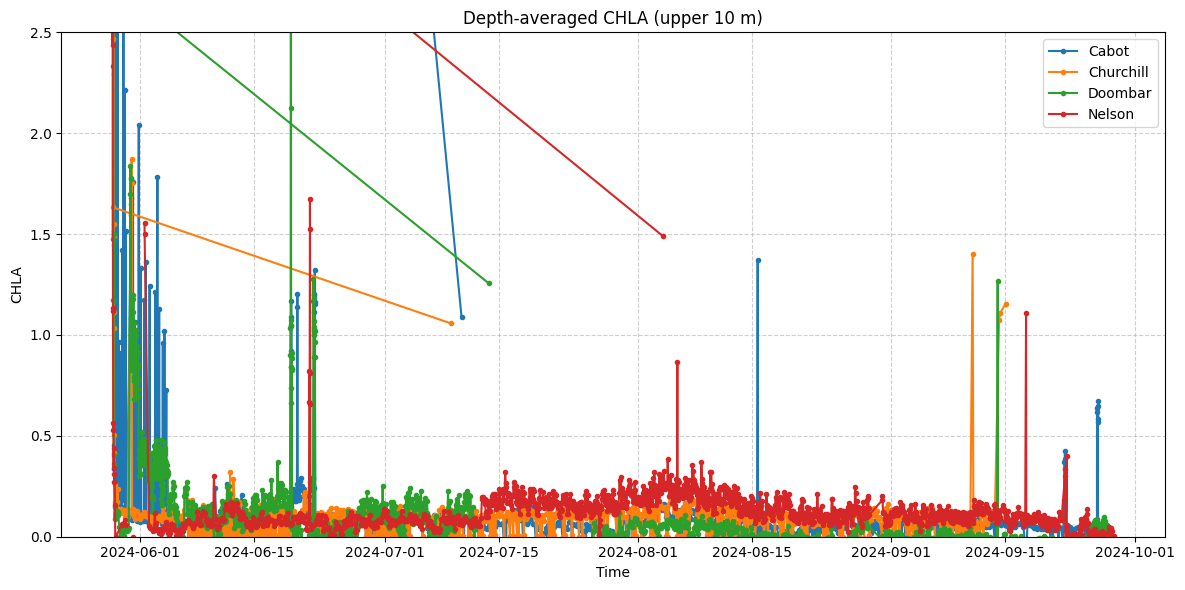

In [12]:
glider_timeseries = plot_profile_timeseries_by_glider(
    glider_datasets,
    variable="CHLA",
    depth_limit=10,
    lat_filter=51,
    ylim=(0, 2.5),
)

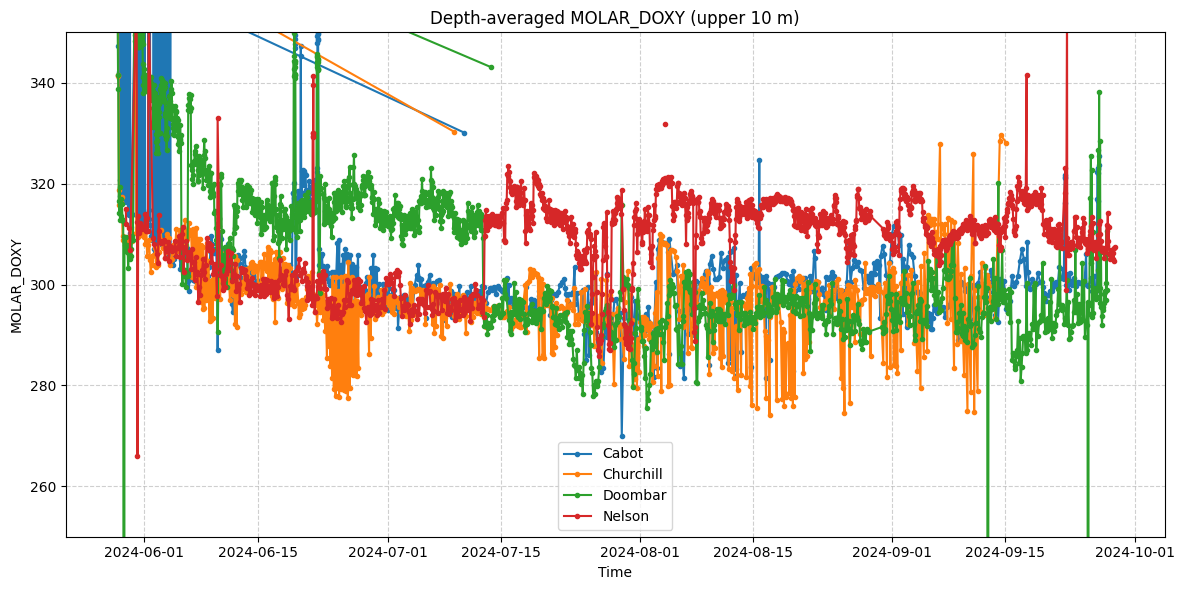

In [13]:
glider_timeseries = plot_profile_timeseries_by_glider(
    glider_datasets,
    variable="MOLAR_DOXY",
    depth_limit=10,
    lat_filter=51,
    ylim=(250, 350)
)

### Function: `plot_glider_profile`

The `plot_glider_profile` function is designed to visualize a vertical profile of a specified variable for a single glider and a specific profile number. The profile is plotted as the variable's value on the x-axis against depth on the y-axis.

#### Parameters:
1. **`glider_ds_dict`**: A dictionary containing datasets for multiple gliders, where the keys are glider names and the values are `xarray.Dataset` objects.
2. **`glider_name`**: The name of the glider (key in the dictionary) for which the profile will be plotted.
3. **`profile_number`**: The profile number to plot, corresponding to the `PROFILE_NUMBER` variable in the dataset.
4. **`variable`**: The variable to plot (e.g., `'CHLA'` for chlorophyll).
5. **`depth_var`** (optional): The name of the depth variable in the dataset. Defaults to `'DEPTH_INTERP'`.
6. **`invert_depth`** (optional): Whether to invert the depth axis so that deeper values are at the bottom. Defaults to `True`.
7. **`figsize`** (optional): The size of the figure. Defaults to `(5, 7)`.

#### Functionality:
1. **Dataset Retrieval**:
    - Retrieves the dataset for the specified glider from the dictionary.
    - Raises an error if the glider name is not found.

2. **Profile Selection**:
    - Filters the dataset to include only the data for the specified profile number.
    - Raises an error if no data is found for the given profile.

3. **Data Extraction and Cleaning**:
    - Extracts the depth and variable values for the selected profile.
    - Removes invalid (NaN) values and sorts the data by depth for proper plotting.

4. **Plotting**:
    - Creates a vertical profile plot with the variable on the x-axis and depth on the y-axis.
    - Optionally inverts the depth axis for a more intuitive representation.
    - Adds labels, a title, and gridlines for clarity.

#### Output:
- Displays the vertical profile plot.
- Does not return any value.

#### Use Case:
This function is useful for examining the vertical structure of a variable (e.g., temperature, salinity, chlorophyll) in a specific profile of a glider dataset. It allows users to inspect the data's quality, trends, and anomalies for a single profile.

In [14]:
def plot_glider_profile(
    glider_ds_dict,
    glider_name,
    profile_number,
    variable,
    depth_var="DEPTH_INTERP",
    invert_depth=True,
    figsize=(5, 7),
):
    """
    Plot a vertical profile (variable vs depth) for a single glider and profile.

    Parameters
    ----------
    glider_ds_dict : dict
        Dictionary of {glider_name: xarray.Dataset}.
    glider_name : str
        Name/key of the glider in the dictionary.
    profile_number : int
        PROFILE_NUMBER to plot.
    variable : str
        Variable to plot (e.g. 'CHLA', 'CONS_TEMP').
    depth_var : str, optional
        Depth variable name (default = 'DEPTH_INTERP').
    invert_depth : bool, optional
        Invert depth axis (default = True).
    figsize : tuple, optional
        Figure size.

    Returns
    -------
    None
    """

    # --------------------------------------------------
    # Retrieve dataset
    # --------------------------------------------------
    if glider_name not in glider_ds_dict:
        raise KeyError(f"Glider '{glider_name}' not found in dictionary.")

    ds = glider_ds_dict[glider_name]

    # --------------------------------------------------
    # Select profile
    # --------------------------------------------------
    profile_ds = ds.where(
        ds.PROFILE_NUMBER == profile_number,
        drop=True
    )

    if profile_ds[variable].size == 0:
        raise ValueError(
            f"No data found for profile {profile_number} on glider '{glider_name}'."
        )

    # --------------------------------------------------
    # Extract and clean data
    # --------------------------------------------------
    depth = profile_ds[depth_var].values
    var = profile_ds[variable].values

    mask = np.isfinite(depth) & np.isfinite(var)
    depth = depth[mask]
    var = var[mask]

    # Sort by depth (important for plotting)
    idx = np.argsort(depth)
    depth = depth[idx]
    var = var[idx]

    # --------------------------------------------------
    # Plot
    # --------------------------------------------------
    plt.figure(figsize=figsize)
    plt.plot(var, depth, marker="o", markersize=3, linewidth=1)

    plt.xlabel(variable)
    plt.ylabel("Depth (m)")

    if invert_depth:
        plt.gca().invert_yaxis()

    plt.title(f"{glider_name} – Profile {profile_number}")
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

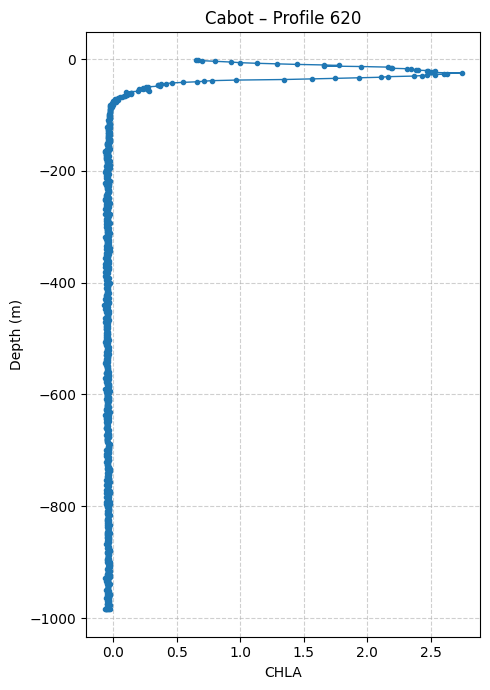

In [15]:
plot_glider_profile(
    glider_datasets,
    glider_name="Cabot",
    invert_depth=False,
    profile_number=620,
    variable="CHLA"
)

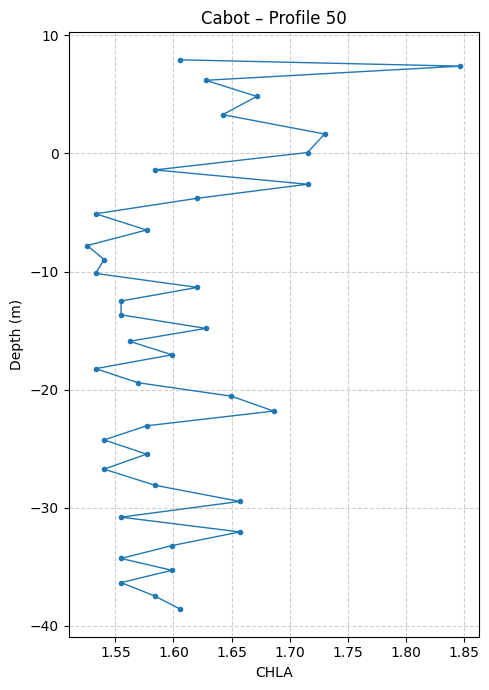

In [16]:
plot_glider_profile(
    glider_datasets,
    glider_name="Cabot",
    invert_depth=False,
    profile_number=50,
    variable="CHLA"
)

### Function: `plot_four_random_profiles`

The `plot_four_random_profiles` function is designed to visualize four random vertical profiles of a specified variable for a given glider. Each profile represents the variable as a function of depth, allowing for quick inspection of the data's vertical structure.

#### Parameters:
1. **`glider_ds_dict`**: A dictionary containing datasets for multiple gliders, where the keys are glider names and the values are `xarray.Dataset` objects.
2. **`glider_name`**: The name of the glider (key in the dictionary) for which the profiles will be plotted.
3. **`variable`**: The variable to plot (e.g., `'CHLA'` for chlorophyll).
4. **`depth_var`** (optional): The name of the depth variable in the dataset. Defaults to `'DEPTH_INTERP'`.
5. **`invert_depth`** (optional): Whether to invert the depth axis so that deeper values are at the bottom. Defaults to `True`.
6. **`seed`** (optional): A random seed for reproducibility of the selected profiles. Defaults to `None`.
7. **`figsize`** (optional): The size of the figure. Defaults to `(10, 8)`.

#### Functionality:
1. **Profile Selection**:
    - Retrieves all unique profile numbers from the dataset for the specified glider.
    - Randomly selects four profiles using a reproducible random number generator (if `seed` is provided).

2. **Data Extraction**:
    - For each selected profile, extracts the depth and variable values.
    - Filters out invalid (NaN) values and sorts the data by depth for proper plotting.

3. **Plotting**:
    - Creates a 2x2 grid of subplots, with each subplot displaying one of the selected profiles.
    - Plots the variable on the x-axis and depth on the y-axis, with optional depth inversion.
    - Adds titles, labels, and gridlines for clarity.

4. **Output**:
    - Displays the plot.
    - Returns the array of selected profile numbers for reference.

#### Use Case:
This function is useful for exploring the variability of a variable across different profiles in a glider dataset. By visualizing random profiles, users can quickly assess the data's quality, trends, and anomalies.

In [17]:
def plot_four_random_profiles(
    glider_ds_dict,
    glider_name,
    variable,
    depth_var="DEPTH_INTERP",
    invert_depth=True,
    seed=None,
    figsize=(10, 8),
):
    """
    Plot 4 random vertical profiles (depth vs variable) for a given glider.

    Parameters
    ----------
    glider_ds_dict : dict
        Dictionary of {glider_name: xarray.Dataset}.
    glider_name : str
        Name of the glider to plot.
    variable : str
        Variable to plot (e.g. 'CHLA').
    depth_var : str, optional
        Depth variable name.
    invert_depth : bool, optional
        Invert depth axis.
    seed : int or None, optional
        Random seed for reproducibility.
    figsize : tuple, optional
        Figure size.

    Returns
    -------
    selected_profiles : np.ndarray
        The 4 profile numbers that were plotted.
    """

    if glider_name not in glider_ds_dict:
        raise KeyError(f"Glider '{glider_name}' not found.")

    ds = glider_ds_dict[glider_name]

    # --------------------------------------------------
    # Pick 4 random profiles
    # --------------------------------------------------
    profiles = np.unique(ds.PROFILE_NUMBER.values)
    profiles = profiles[np.isfinite(profiles)].astype(int)

    if len(profiles) < 4:
        raise ValueError("Not enough profiles to select 4.")

    rng = np.random.default_rng(seed)
    selected_profiles = rng.choice(profiles, size=4, replace=False)

    # --------------------------------------------------
    # Create figure
    # --------------------------------------------------
    fig, axes = plt.subplots(2, 2, figsize=figsize, sharey=True)
    axes = axes.flatten()

    for ax, prof in zip(axes, selected_profiles):

        prof_ds = ds.where(ds.PROFILE_NUMBER == prof, drop=True)

        depth = prof_ds[depth_var].values
        var = prof_ds[variable].values

        mask = np.isfinite(depth) & np.isfinite(var)
        depth = depth[mask]
        var = var[mask]

        idx = np.argsort(depth)
        depth = depth[idx]
        var = var[idx]

        ax.plot(var, depth, marker="o", markersize=3, linewidth=1)

        ax.set_title(f"Profile {prof}")
        ax.set_xlabel(variable)
        ax.grid(True, linestyle="--", alpha=0.5)

        if invert_depth:
            ax.invert_yaxis()

    axes[0].set_ylabel("Depth (m)")
    axes[2].set_ylabel("Depth (m)")

    fig.suptitle(f"{glider_name}: {variable} – 4 random profiles", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return selected_profiles

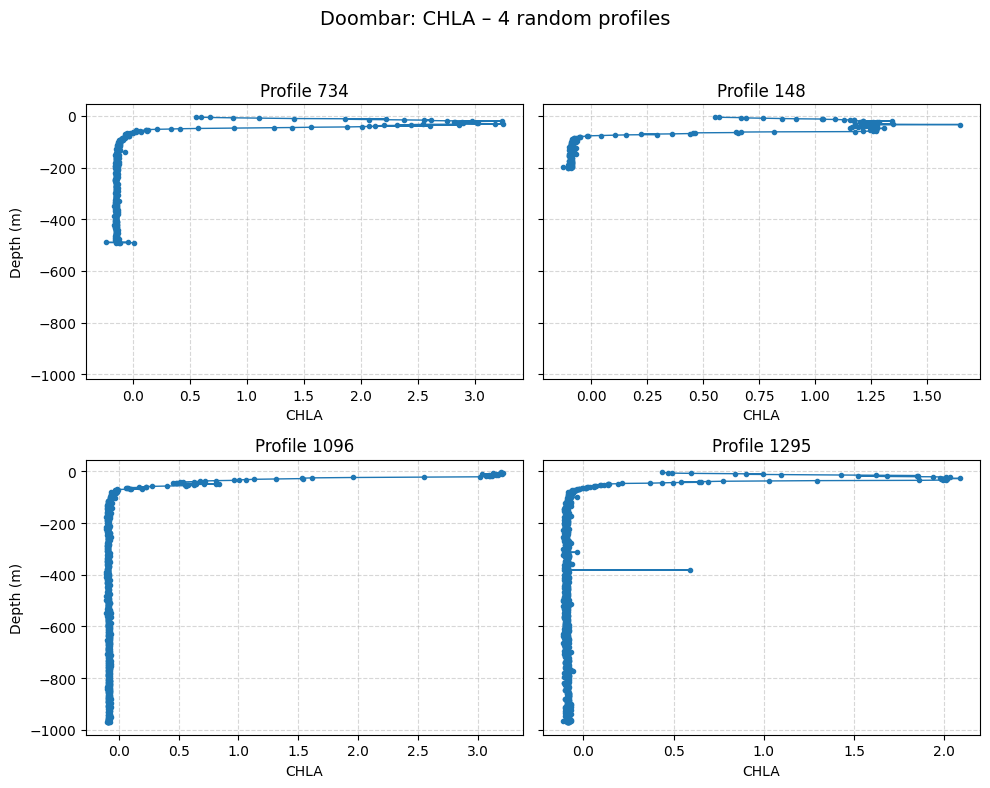

Plotted profiles: [ 734  148 1096 1295]


In [18]:
selected = plot_four_random_profiles(
    glider_datasets,
    glider_name="Doombar",
    variable="CHLA",
    seed=42  # reproducible
)

print("Plotted profiles:", selected)
